### DS219 HW8
#### Peiyang Liu
#### 1. Importing Data and Libraries

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [30]:
# import data
df = pd.read_excel('air+quality\AirQualityUCI.xlsx')
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


#### 2. Exploratory Data Analysis (EDA)

In [31]:
# issue of nan values
# "-200" as nan values according to the documentation
df = df.replace(-200, np.nan)
# check nan values
df.isna().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

Here, we can see there's a lot of missing data in columns like CO(GT), NMHC(GT), NOx(GT), NO2(GT).

In [32]:
# check datatype
df.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

In [33]:
# summary statistics
df.describe()

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357,7674.000000,8991.000000,914.000000,8991.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,2004-09-21 04:30:05.193972480,2.152750,1099.707856,218.811816,10.082993,939.029205,246.881252,835.370973,113.075515,1456.143486,1022.780725,18.316054,49.232360,1.025530
min,2004-03-10 00:00:00,0.100000,647.250000,7.000000,0.149048,383.250000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.175000,0.184679
25%,2004-06-16 00:00:00,1.100000,936.750000,67.000000,4.436942,734.375000,98.000000,657.875000,78.000000,1226.625000,731.375000,11.787500,35.812500,0.736769
50%,2004-09-21 00:00:00,1.800000,1063.000000,150.000000,8.239851,909.000000,179.800000,805.500000,109.000000,1462.750000,963.250000,17.750000,49.550000,0.995395
75%,2004-12-28 00:00:00,2.900000,1231.250000,297.000000,13.988478,1116.250000,326.000000,969.250000,142.000000,1673.500000,1273.375000,24.400000,62.500001,1.313701
max,2005-04-04 00:00:00,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036
std,NaN,1.453252,217.084571,204.459921,7.449640,266.829000,212.971224,256.815106,48.359250,346.204540,398.480897,8.832888,17.316389,0.403813


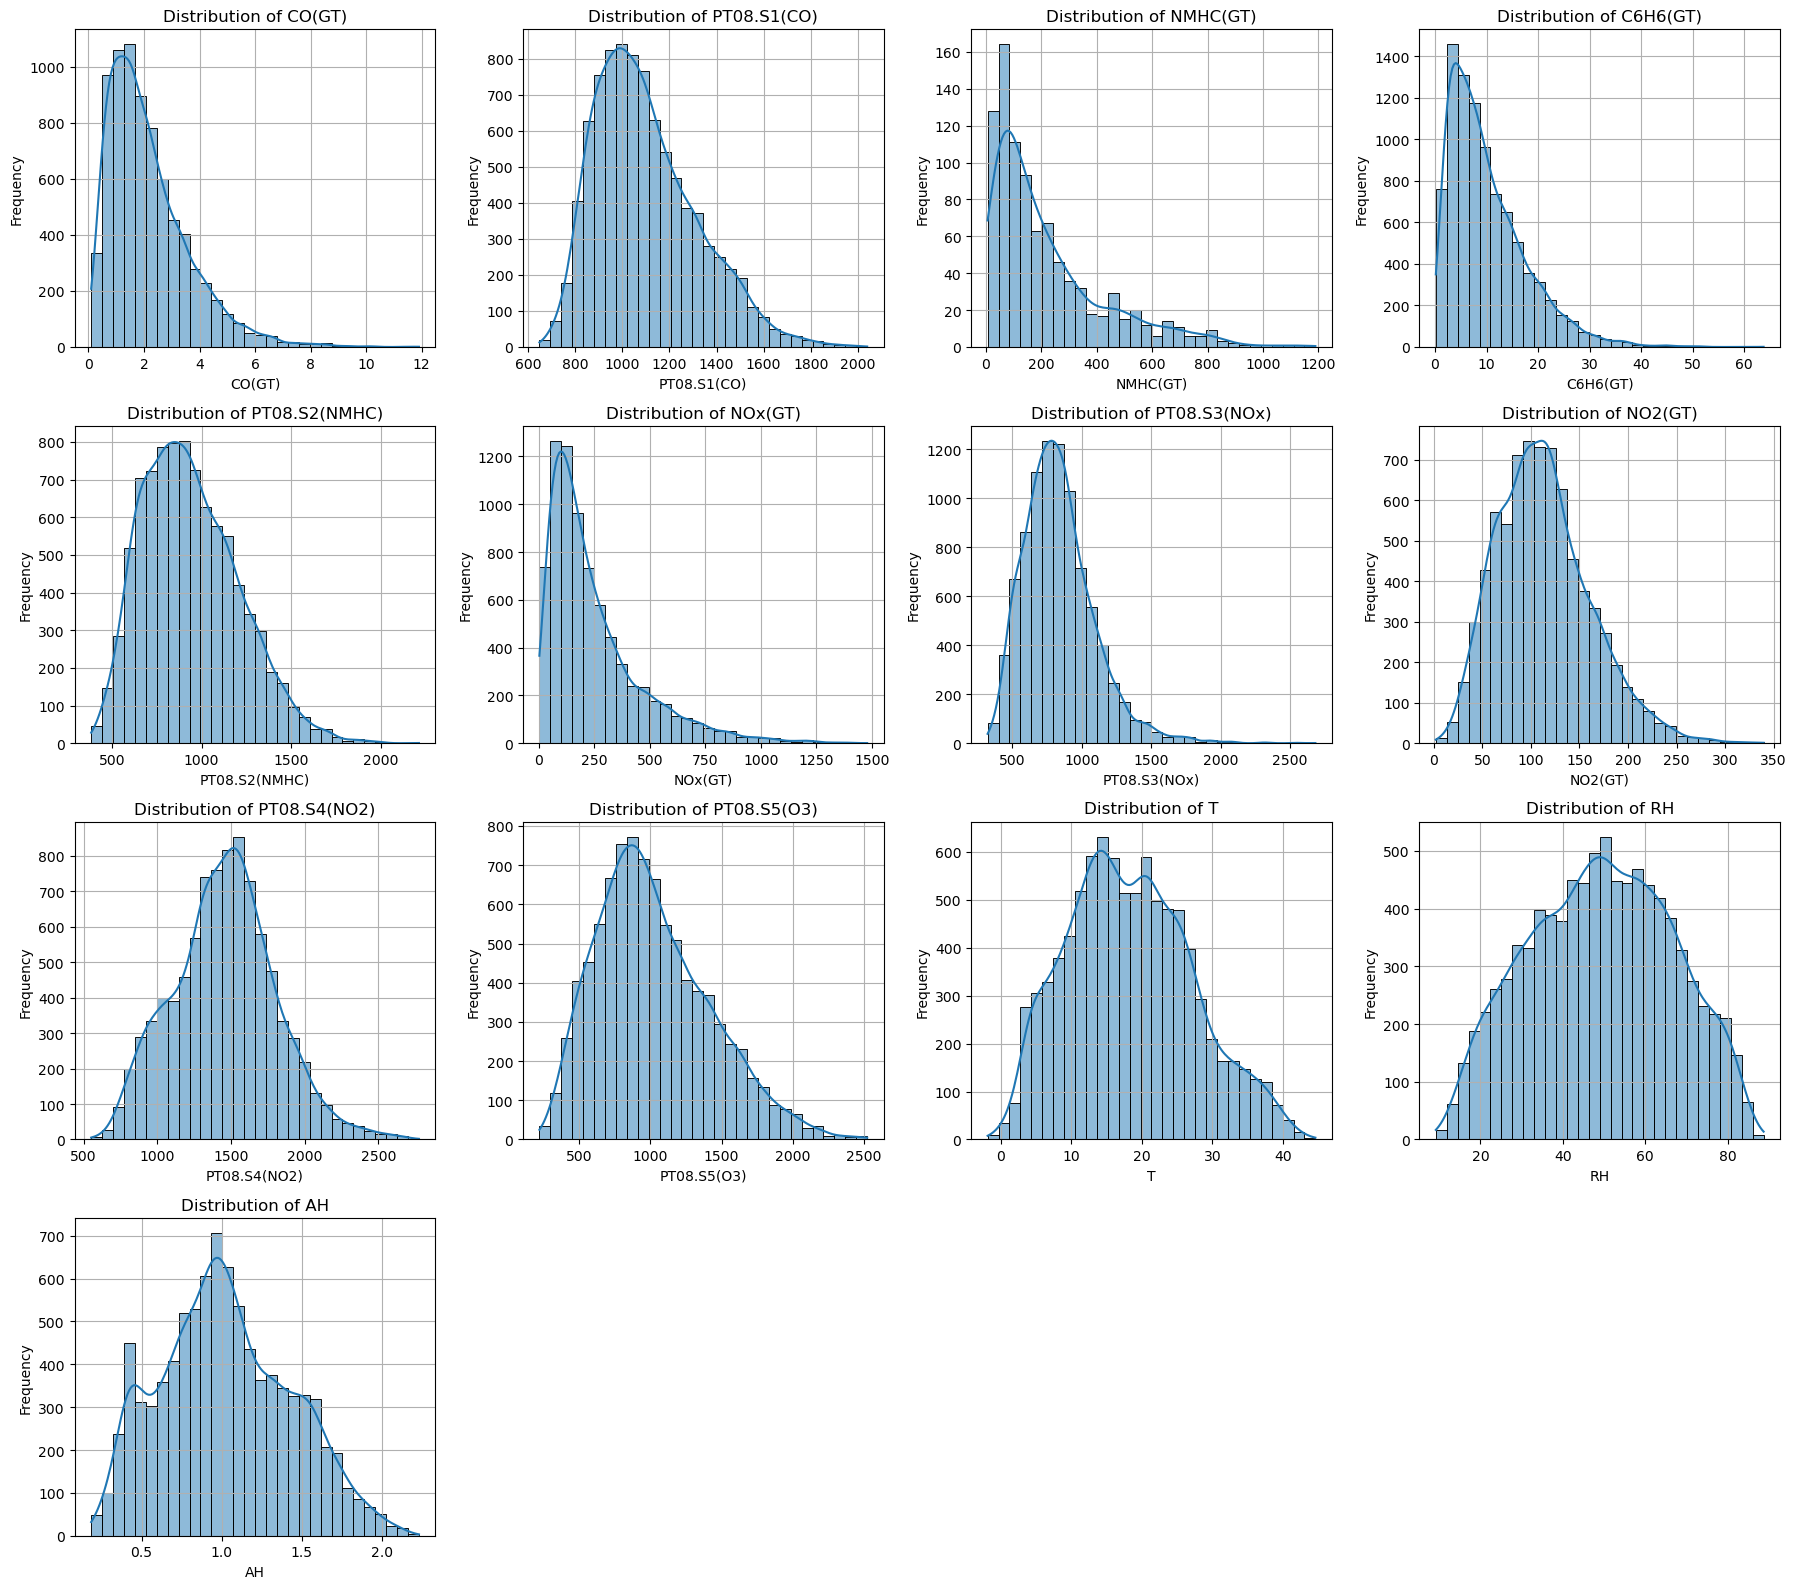

In [34]:
# visualize the distribution of the variables
columns_to_plot = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 
                   'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 
                   'T', 'RH', 'AH']

num_cols = 4 
num_rows = -(-len(columns_to_plot) // num_cols) 
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 4))
axes = axes.flatten()
for i, column in enumerate(columns_to_plot):
    sns.histplot(df[column], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].grid()
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()




As we can see from above, most pollutant-related variables, such as CO(GT), PT08.S1(CO), NMHC(GT), C6H6(GT), PT08.S2(NMHC), NOx(GT), PT08.S3(NOx), PT08.S4(NO2), PT08.S5(O3), and AH, are positively skewed, with values concentrated on the lower end and long tails to the right—indicative of occasional high pollution spikes. In contrast, NO2(GT), T (temperature), and RH (relative humidity) exhibit more symmetric or approximately normal distributions, reflecting more stable and naturally varying environmental conditions. 

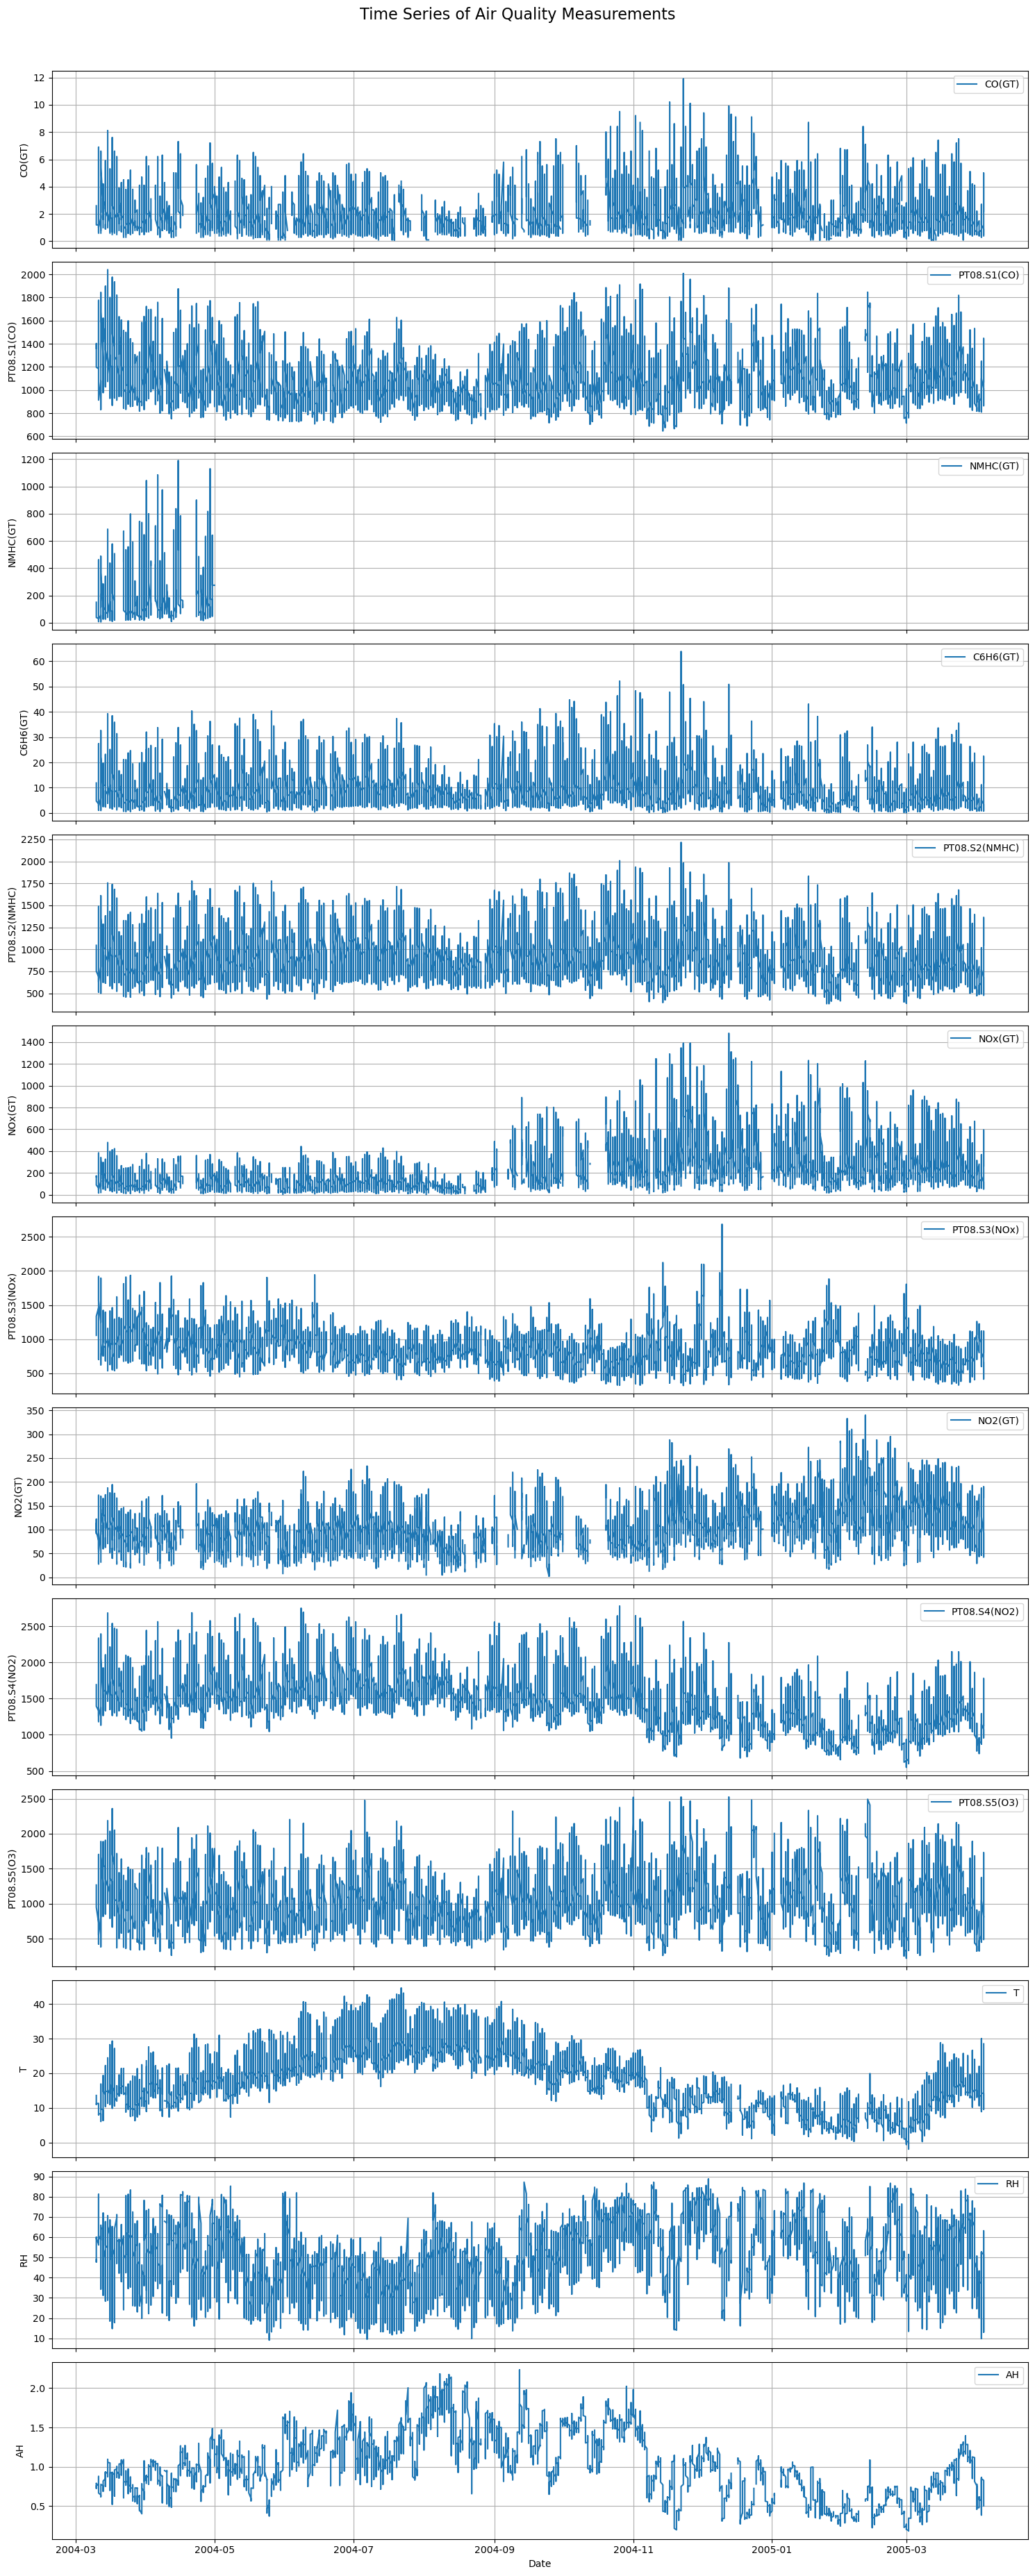

In [ ]:
# plot the columns against time
def plot_time_series_stacked(data, columns):
    num_plots = len(columns)
    fig, axes = plt.subplots(num_plots, 1, figsize=(15, 3 * num_plots), sharex=True)

    for i, column in enumerate(columns):
        ax = axes[i]
        ax.plot(data['Date'], data[column], label=column)
        ax.set_ylabel(column)
        ax.legend(loc='upper right')
        ax.grid(True)

    axes[-1].set_xlabel('Date')
    fig.suptitle('Time Series of Air Quality Measurements', fontsize=16)
    fig.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.show()

columns_to_plot = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
                   'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)',
                   'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
plot_time_series_stacked(df, columns_to_plot)

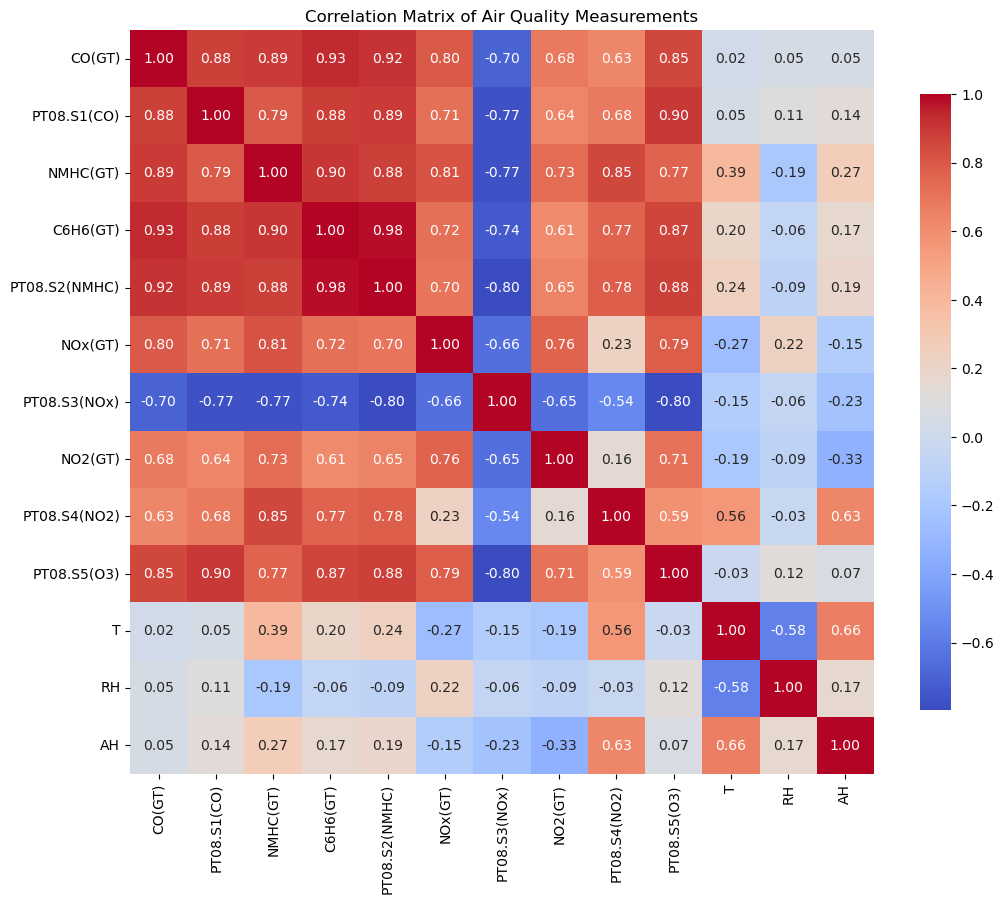

In [ ]:
# correlation heatmaps
df_corr = df.drop(columns=['Date', 'Time'])
corr_matrix = df_corr.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Air Quality Measurements')
plt.show()  


aswe